## Project on Predictive Analysis on BigMart Outlet Sells
### Prolem Statement:
##### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Hypothesis Generation:
1. The price of a product have a significant impact on its sales volume.

2. The location of a store (city) have an impact on the sales of certain products.

3. The promotional activities for a product can significantly increase its sales volume.

4. The age of a store can impact its sales

5. The size of a store can impact its sales.

6. The packaging of a product can impact its sales.

7. The availability of a product can impact its sales.

8. The visibility of a product within a store can impact its sales.

9. The nutritional value of a food product can impact its sales.

10. Popular brands may have higher sales than less well-known brands.

### Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train_df['source'] = 'train'
test_df['source'] = 'test'

# Concatenate the two DataFrames vertically
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Exploratory Data Analysis

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [9]:
# lets see how many number of items are present in each column
df.apply(lambda a: len(a.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

### Univariate Analysis

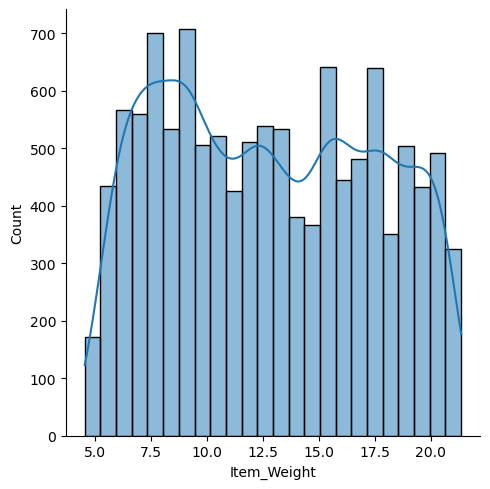

In [10]:
sns.displot(df['Item_Weight'], kde=True)                     # Numerical values

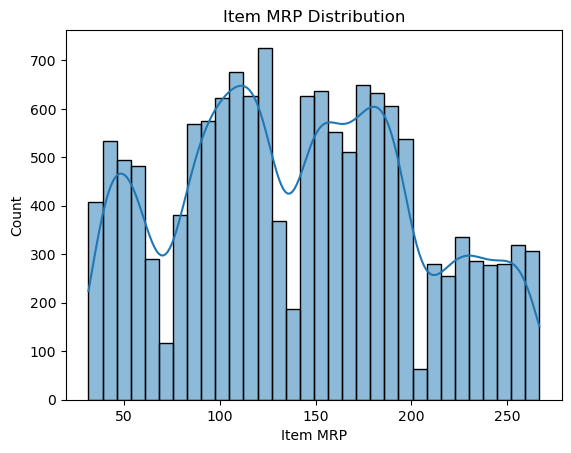

In [11]:
sns.histplot(df['Item_MRP'], kde=True)
plt.title('Item MRP Distribution')
plt.xlabel('Item MRP')                                        # Numerical values
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


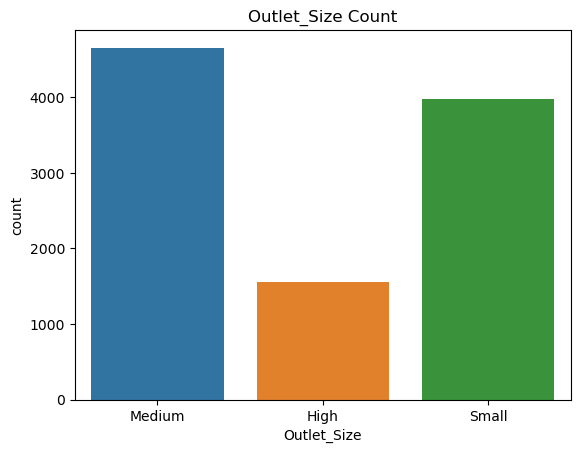

In [12]:
sns.countplot(df['Outlet_Size'])
plt.title('Outlet_Size Count')                              # categorical values
plt.xlabel('Outlet_Size')
plt.show()

### Bivariate Analysis

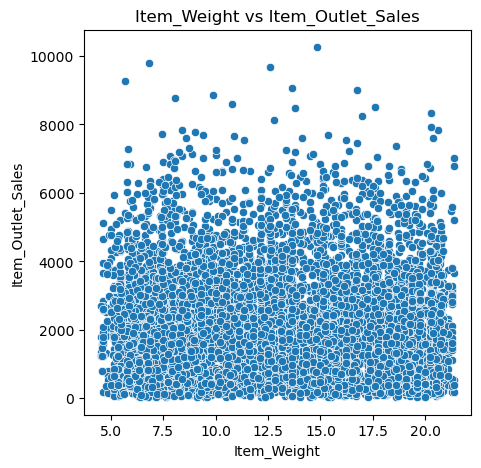

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.title('Item_Weight vs Item_Outlet_Sales')                           # Numerical values
plt.show()

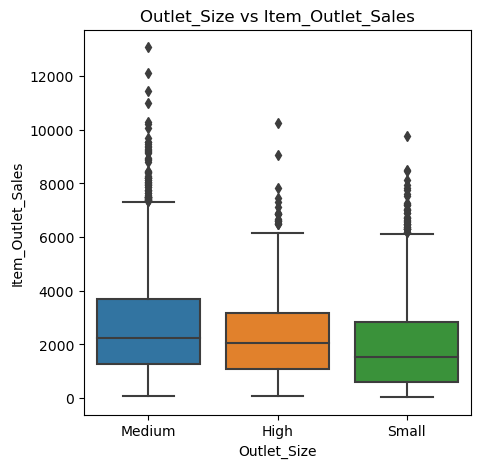

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Outlet_Size vs Item_Outlet_Sales')                     # Categorical values
plt.show()

### Missing Value Treatment

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Here we have to figure out only missing value for Item_Weight and Outlet_size. The Item_Outlet_Sales is ok because it is missing value of test data.

In [16]:
mean_item_weight = df['Item_Weight'].mean()  
# Calculate the mean value of the 'Item_Weight' column because it is numerical column

df['Item_Weight'].fillna(mean_item_weight, inplace=True)
# Fill in the NaN values in the 'Item_Weight' column with the mean value

In [17]:
# Calculate the mode value of the 'Outlet_Size' column because it is categorical column
Outlet = df['Outlet_Size'].mode()
Outlet

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
df['Outlet_Size'].fillna('Median', inplace=True)
# Fill in the NaN values in the 'Item_Weight' column with the mean value

In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Feature Engineering

In [20]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [21]:
# types of different categories of each variable, excluding the 'Item_Identifier', 'Item_Identifier' and 'source' 
# appling for loop for calculating values of types of variables
variables = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# list of variables

for var in variables:
    print('Types in', var)
    print(df[var].value_counts())
    print('\n')
# calculate different types of value in each variable

Types in Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Types in Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Types in Outlet_Size
Medium    4655
Median    4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


Types in Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


Types in Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3 

In [22]:
# Item_Fat_Content should be combined to Low Fat and Regular

In [23]:
# replace "LF" and "low fat" with "Low Fat"
# replace "reg" with "Regular"
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"})
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [24]:
df["Item_Type"].value_counts()
# Each items are unique so directly replace by dummy column

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [25]:
df['Outlet_Size'] = df['Outlet_Size'].replace({'Median':'Medium'})
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [26]:
# Every thing in Outlet_Location_Type and Outlet_Type are uniquie values

### Label Encoding and Encoding Categorical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = le.fit_transform(df['Item_Type'])

df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [30]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train


### One Hot Encoding

In [31]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 
                                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,1,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,0,1,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,1,0,...,0,1,0,1,0,0,0,1,0,0


### PreProcessing Data

In [32]:
df.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'],axis=1,inplace=True)

In [33]:
train_df = df.loc[df['source']=="train"]
test_df = df.loc[df['source']=="test"]

In [34]:
train_df.drop(['source'],axis=1,inplace=True)
test_df.drop(['source'],axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10604\201127670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['source'],axis=1,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10604\201127670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['source'],axis=1,inplace=True)


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             8523 non-null   float64
 1   Item_Visibility         8523 non-null   float64
 2   Item_MRP                8523 non-null   float64
 3   Item_Outlet_Sales       8523 non-null   float64
 4   Item_Fat_Content_0      8523 non-null   uint8  
 5   Item_Fat_Content_1      8523 non-null   uint8  
 6   Item_Type_0             8523 non-null   uint8  
 7   Item_Type_1             8523 non-null   uint8  
 8   Item_Type_2             8523 non-null   uint8  
 9   Item_Type_3             8523 non-null   uint8  
 10  Item_Type_4             8523 non-null   uint8  
 11  Item_Type_5             8523 non-null   uint8  
 12  Item_Type_6             8523 non-null   uint8  
 13  Item_Type_7             8523 non-null   uint8  
 14  Item_Type_8             8523 non-null   

### Modeling


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = train_df.drop('Item_Outlet_Sales', axis=1)
y = train_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=200)

### Linear Regression

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [39]:
lr = linear_model.LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
predicted = lr.predict(X_test)

In [42]:
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,predicted))

MEAN ABSOLUTE ERROR : 818.4622402888791


In [43]:
print('MEAN SQUARED ERROR :', mean_squared_error(y_test,predicted))

MEAN SQUARED ERROR : 1220246.532610865


### Regularized Linear Regression

In [44]:
lasso = linear_model.Lasso(alpha=0.1)                   # Lasso

In [45]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [46]:
predicted = lasso.predict(X_test)

In [47]:
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,predicted))

MEAN ABSOLUTE ERROR : 818.2665356324377


In [48]:
print('MEAN SQUARED ERROR :', mean_squared_error(y_test,predicted))

MEAN SQUARED ERROR : 1219757.8706968059


In [49]:
ridge = linear_model.Ridge(alpha=0.1)                               #Ridge

In [50]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [51]:
predicted = ridge.predict(X_test)

In [52]:
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,predicted))

MEAN ABSOLUTE ERROR : 818.4623064696723


In [53]:
print('MEAN SQUARED ERROR :', mean_squared_error(y_test,predicted))

MEAN SQUARED ERROR : 1220251.7653496172


### RandomForest

In [54]:
from sklearn import ensemble

In [55]:
rf = ensemble.RandomForestRegressor()

In [56]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
predicted = rf.predict(X_test)

In [58]:
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,predicted))

MEAN ABSOLUTE ERROR : 779.7648219906158


In [59]:
print('MEAN SQUARED ERROR :', mean_squared_error(y_test,predicted))

MEAN SQUARED ERROR : 1244530.017272249


### XGBoost

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
from xgboost import XGBRegressor

In [62]:
xgb = XGBRegressor()

In [63]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
predicted = xgb.predict(X_test)

In [65]:
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test,predicted))

MEAN ABSOLUTE ERROR : 797.394254937612


In [66]:
print('MEAN SQUARED ERROR :', mean_squared_error(y_test,predicted))

MEAN SQUARED ERROR : 1313810.2220023966


### Summary

In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define the models to evaluate
models = [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), XGBRegressor()]

# Define a list to store the scores of each model
scores = []

# Loop through each model and fit and score the model on the train and test data
for model in models:
    # Fit the model on the train data
    model.fit(X_train, y_train)
   
    # Prediction
    predicted = model.predict(X_test)
    
    # Store the scores of the model in the scores list
    scores.append({'Model': type(model).__name__, 'Scores' : model.score(X_test,y_test)})

# Create a dataframe of the scores
Score_df = pd.DataFrame(scores)

print(Score_df)

                   Model    Scores
0       LinearRegression  0.577316
1                  Lasso  0.578164
2                  Ridge  0.577297
3  RandomForestRegressor  0.569866
4           XGBRegressor  0.544906
